In [18]:
import numpy as np
import random
random.seed(40)

### Các hàm sinh khóa, mã hóa, giải mã

In [19]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
def generate_key(p):
    a = random.randint(2, p - 1)
    x = random.randint(2, p - 2)
    
    # Tính h = a^x mod p
    y = pow(a, x, p)
    
    # Trả về khóa công khai và khóa bí mật
    return (p, a, y), x

def Dec_to_Hex(decimal_number, min_chars):
    hex_number = hex(decimal_number)[2:]  # Chuyển đổi thành số hệ 16 và loại bỏ tiền tố "0x"
    padded_hex_number = hex_number.zfill(min_chars)  # Điền đầy 0 nếu cần thiết
    return padded_hex_number

def Hex_to_Dec(Hex_number):
    decimal_number = int(Hex_number, 16)
    return decimal_number

def minimum_hex_chars(dec):
    # Chuyển đổi số dec thành số hex
    hex_number = hex(dec)[2:]

    # Trả về số lượng ký tự hex tối thiểu
    return len(hex_number)


def encrypt(plaintext, public_key):
    list_ciphertext_c1 = ''
    list_ciphertext_c2 = ''
    p, g, A = public_key
    min_chars = minimum_hex_chars(p)
    for c in plaintext:
        # if c not in alphabet:
        #     continue
        plaintext_to_int = ord(c)
        
        # Chọn một số nguyên k ngẫu nhiên
        k = random.randint(2, p - 2)
        
        # Tính a = g^k mod p
        c1 = pow(g, k, p)
        # Tính b = h^k * plaintext mod p
        c2 = (pow(A, k, p) * plaintext_to_int) % p
        # Chuyển về Hex
        c1 = Dec_to_Hex(c1, min_chars)
        c2 = Dec_to_Hex(c2, min_chars)
        list_ciphertext_c1 += c1
        list_ciphertext_c2 += c2
    # Trả về cặp giá trị mã hóa (a, b)
    return list_ciphertext_c1, list_ciphertext_c2

# Hàm chia chuỗi thành các đoạn có độ dài bằng nhaus
def split_equal_length(string, length):
    # Chia chuỗi thành các phần có độ dài bằng nhau
    return [string[i:i+length] for i in range(0, len(string), length)]

def decrypt(ciphertext, private_key, p):
    BanRo = ''
    min_chars = minimum_hex_chars(p)
    list_c1 = split_equal_length(ciphertext[0], min_chars)
    list_c2 = split_equal_length(ciphertext[1], min_chars)
    for i in range(len(list_c1)):
        c1 = Hex_to_Dec( list_c1[i] )
        c2 = Hex_to_Dec( list_c2[i] )
        
        # Tính a^x mod p
        ax = pow(c1, private_key, p)
        
        # Tính a^(-x) mod p
        ax_inv = pow(ax, -1, p)
        
        # Tính plaintext = (a^(-x) * b) mod p
        plaintext = (ax_inv * c2) % p
        BanRo += chr(plaintext)
    # Trả về giá trị giải mã
    return BanRo

### Khởi tạo

In [20]:
# Ví dụ sử dụng
p = 701   # Số nguyên tố p
plaintext = 'viet dep trai nhat he mat Troi'   # Plaintext

# Tạo khóa công khai và khóa bí mật
public_key, private_key = generate_key(p)

In [21]:
public_key, private_key

((701, 471, 63), 595)

### Mã hóa

In [22]:
ciphertext = encrypt(plaintext, public_key)
print("Ciphertext:", ciphertext)

Ciphertext: ('1d42440c62ad2921de2922b604a25c1412a507d0531f90cb2730211dc0d61b825801c06712529302d0a7178040', '0f50e820912a07f1e825613a12220e24b29413207f2a524c02920e05725028707f22e09020e19b1d20721721d5')


### Giải mã

In [23]:
decrypted_text = decrypt(ciphertext, private_key, p)
print("Decrypted text:", decrypted_text)

Decrypted text: viet dep trai nhat he mat Troi


### Mã hóa hình ảnh

(512, 384)

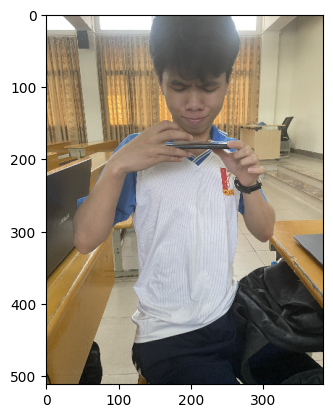

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

input_image = cv2.imread('../test_image/nu.jpg')
input_image = cv2.resize(input_image, None, fx= 0.2, fy= 0.2, interpolation= cv2.INTER_LINEAR)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
width, height = input_image.shape[0], input_image.shape[1]
width, height

In [25]:
def encrypt_image(image, public_key):
    width, height = image.shape[0], image.shape[1]
    list_ciphertext_c1 = np.zeros((width, height, 3), dtype='int')
    list_ciphertext_c2 = np.zeros((width, height, 3), dtype='int')
    p, g, A = public_key
    for i in range(3):
        for c in range(height):
            for r in range(width):
                # if c not in alphabet:
                #     continue
                plaintext_to_int = image[r, c, i]
                
                # Chọn một số nguyên k ngẫu nhiên
                k = random.randint(2, p - 2)
                
                # Tính a = g^k mod p
                c1 = pow(g, k, p)
                # Tính b = h^k * plaintext mod p
                c2 = (pow(A, k, p) * plaintext_to_int) % p
                # Chuyển về Hex
                list_ciphertext_c1[r, c, i] = c1
                list_ciphertext_c2[r, c, i] = c2
        # Trả về cặp giá trị mã hóa (a, b)
    return list_ciphertext_c1, list_ciphertext_c2


def decrypt_image(ciphertext, private_key, p):
    width, height = ciphertext[0].shape[0], ciphertext[0].shape[1]
    output_image =  np.zeros((width, height, 3), dtype='int')
    list_c1 = ciphertext[0]
    list_c2 = ciphertext[1]
    for i in range(3):
        for c in range(height):
            for r in range(width):
                # if c not in alphabet:
                #     continue
                c1 = int(list_c1[r, c, i])
                c2 = int(list_c2[r, c, i])
                # Tính a^x mod p
                ax = pow(c1, private_key, p)
                
                # Tính a^(-x) mod p
                ax_inv = pow(ax, -1, p)
                # Tính plaintext = (a^(-x) * b) mod p
                plaintext = (ax_inv * c2) % p
                output_image[r, c, i] = plaintext
            # Trả về giá trị giải mã
    return output_image

### Mã hóa

In [26]:
fake_image = encrypt_image(input_image, public_key)

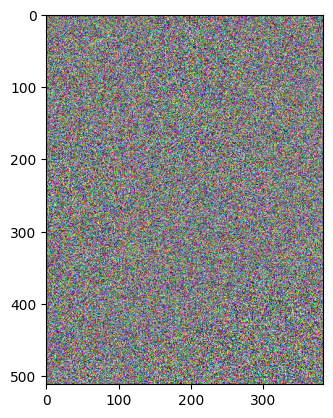

In [27]:
plt.imshow(fake_image[1]/p)

### Giải mã

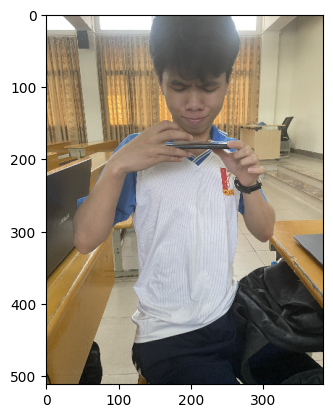

In [28]:
real_image = decrypt_image(fake_image, private_key, p)
plt.imshow(real_image)